<a href="https://colab.research.google.com/github/Santhanakrishnan2004/ML-Models/blob/main/multiplelinearregression/multiplelinearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv('economic_index.csv')

In [6]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [11]:
#drop unncecessary colums
df.drop(columns=['Unnamed: 0','year','month'],axis=1 , inplace=True)

In [12]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [14]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


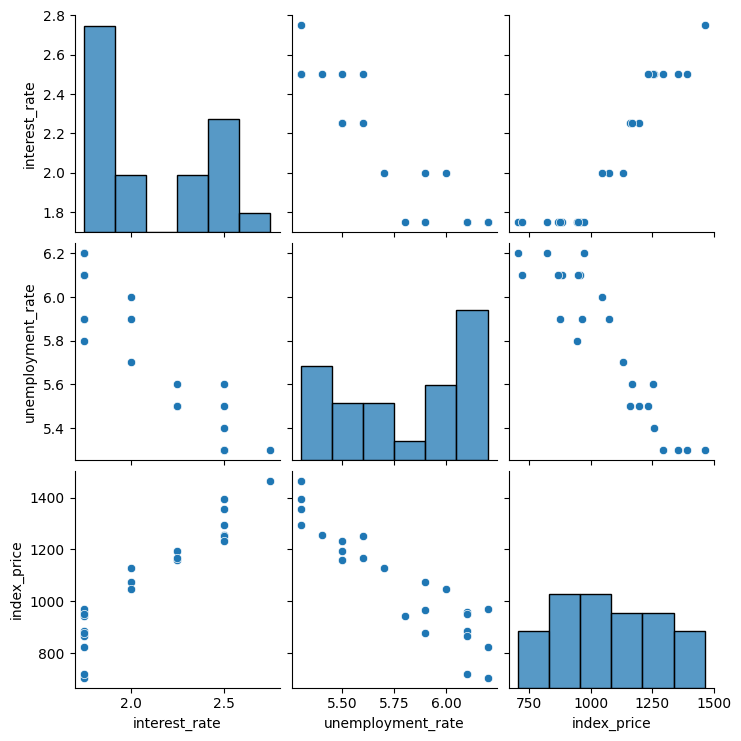

In [15]:
import seaborn as sns
sns.pairplot(df)

In [16]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

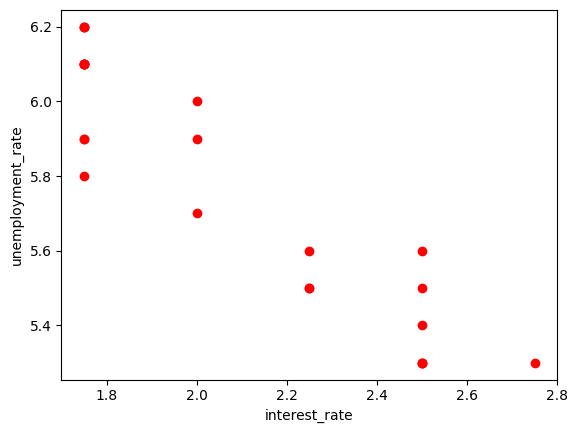

In [19]:
##visualize the data points
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [23]:
#indpendednt nd dependent features
X= df[['interest_rate','unemployment_rate']]
y= df['index_price']

In [28]:
X.shape

(24, 2)

In [29]:
y.shape

(24,)

In [30]:
#train test splir
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

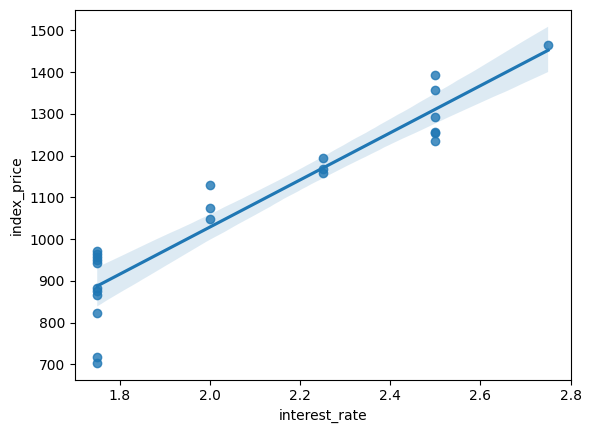

In [33]:
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

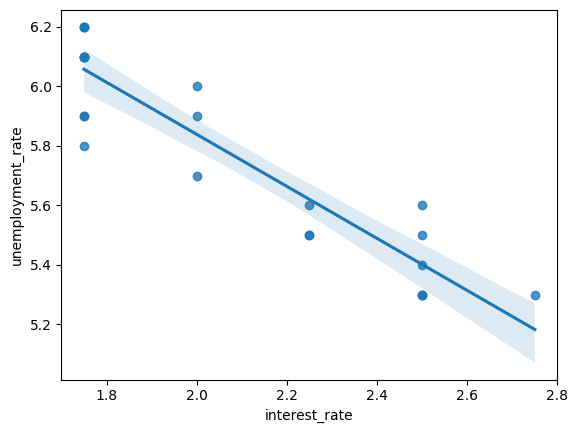

In [35]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

In [36]:
#standar scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [37]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [40]:
model.fit(X_train,y_train)

LinearRegression()

In [41]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [42]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [43]:
np.mean(validation_score)

-5914.828180162386

In [44]:
##predicition
y_pred= model.predict(X_test)

In [45]:

from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
mse =mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
accuracy = r2_score(y_test,y_pred)

adjustedr = 1-((1-accuracy)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MSE',mse)
print('MAE',mae)
print('RMSE',rmse)
print('R squared Accuracy',accuracy)
print('adjusted R squared Accuracy',adjustedr)

MSE 8108.567426306604
MAE 73.80444932337097
RMSE 90.04758423359621
R squared Accuracy 0.7591371539010257
adjusted R squared Accuracy 0.5985619231683761


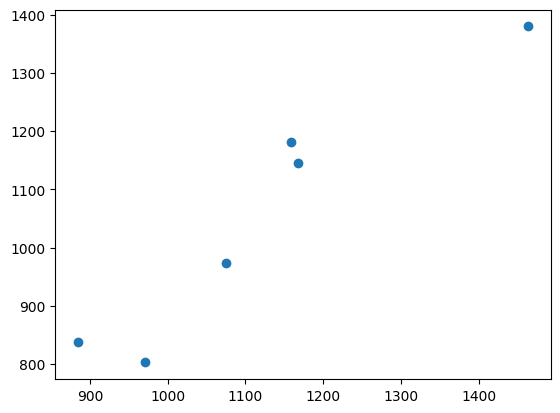

In [51]:
#Assumptions
plt.scatter(y_test,y_pred)

In [52]:
residuals = y_test-y_pred
residuals

,index_price
8,-21.746681
16,168.257203
0,84.165430
18,45.474004
11,101.146860
9,22.036518


<ipython-input-56-23a673a93a6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,color='r',kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

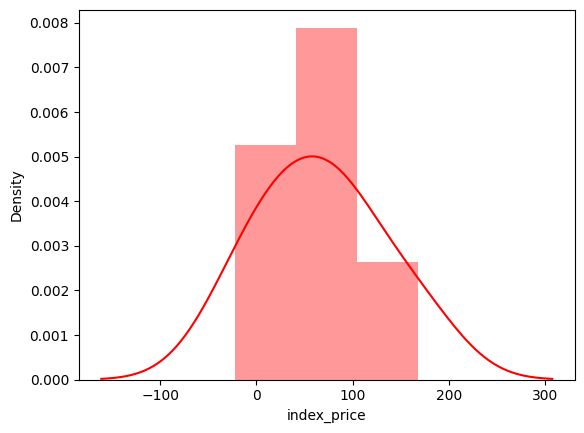

In [56]:
sns.distplot(residuals,color='r',kde=True)

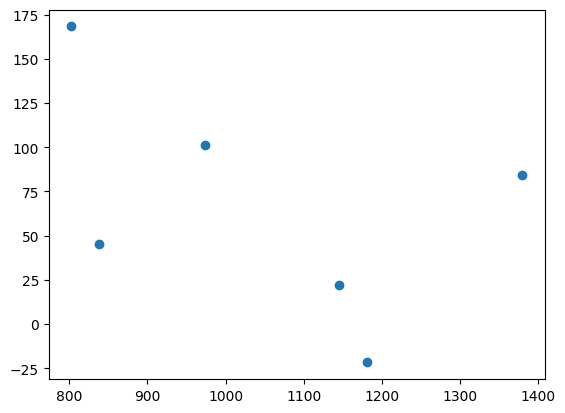

In [57]:
plt.scatter(y_pred,residuals)

In [60]:

#old linear regression
import statsmodels.api as sm
modelw =sm.OLS(y_train,X_train).fit()
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 21 Jan 2025   Prob (F-statistic):                       0.754
Time:                        06:47:45   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""